In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime


# Беседин Георгий

In [2]:
# задание 1 балл (сум 1)
# загрузить данные, индекс - переменная вида дата/время
data = pd.read_csv('C:/Users/Admin/Downloads/crime.csv.zip', index_col=0 , parse_dates=True)
data.index = pd.to_datetime(data.index)
data


,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 23:09:00,VT-2015-45658,VT,Hartford,Windsor County,50027.0,I 91 S MM69,ROYALTON VSP,M,74.0,74.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,-7.206477e+07
2015-12-31 23:40:00,VT-2015-45659,VT,Hartland,Windsor County,50027.0,I 91 S MM66,ROYALTON VSP,F,29.0,29.0,...,White,Moving Violation,Moving violation,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-7.206477e+07
2015-12-31 23:44:00,VT-2015-45660,VT,Brattleboro,Windham County,50025.0,MAIN ST & HIGH ST,BRATTLEBORO VSP,F,24.0,24.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,5.621929e+08
2015-12-31 23:55:00,VT-2015-45661,VT,Weathersfield,Windsor County,50027.0,VT RT 131 & VT RT 106,ROCKINGHAM VSP,M,55.0,55.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,1.025131e+09


In [7]:
# задание 1 балл (сум 2)
# построить сводную таблицу по клоличеству 
# правонарушений (строки - пол (driver_gender), колонки - расса (driver_race))
pivot_violations = pd.pivot_table(data, values='violation', index='driver_gender', columns='driver_race', aggfunc='count')
display(pivot_violations)

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,1022,1339,579,75,96096
M,2424,4232,1983,188,165243


In [8]:
# задание 1 балл (сум 3)
# построить сводную таблицу по процентам в зависимости от рассы (1 - для каждой рассы)
# и пола внутри рассы (например, белые мужчины 0.8, белые женщины 0.2)
# в таблице строки - пол, колонки - расса
pivot_percent_violations = pd.crosstab(values=data.violation, index=data.driver_gender, 
                                        columns=data.driver_race, aggfunc='count', normalize='columns')
display(pivot_percent_violations)

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,0.296576,0.240352,0.225995,0.285171,0.367706
M,0.703424,0.759648,0.774005,0.714829,0.632294


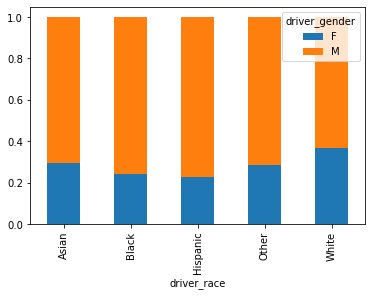

In [9]:
# задание 1 балл (сум 4)
# результат предидущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и 
# разделением внутри по полу (внимание! подписи на графике)
# seaborn так делать не умеет
pivot_percent_violations.T.plot(kind='bar', stacked=True);

In [10]:
# задание 1 балла (сум 5)
# какое кодичество правонарушений  по видам нарушений (violation) 
# зафиксированны для мужчин и женщин (driver_gender)
# обязательно посчитать суммы по строкам/столбцам
# в таблице не должны быть np.nan (только числа)
# все оформить в виде одной сводной таблицы
pd.pivot_table(data, columns = 'driver_gender', index = 'violation', aggfunc = 'count', values = 'id').fillna(0)

driver_gender,F,M
violation,,
DUI,198.0,513.0
Equipment,18755.0,31845.0
Moving violation,76717.0,135383.0
Other,3441.0,6327.0
Other (non-mapped),0.0,2.0


In [11]:
day_v = data.violation.resample('D').count()
plot_df_weekend = day_v[day_v.index.dayofweek >=5]
plot_df_work = day_v[day_v.index.dayofweek < 5]
listdays = np.where(day_v.index.dayofweek>=5, 'Вых','Раб')
listdays

array(['Раб', 'Раб', 'Вых', ..., 'Раб', 'Раб', 'Раб'], dtype='<U3')

<AxesSubplot:xlabel='None,violation'>

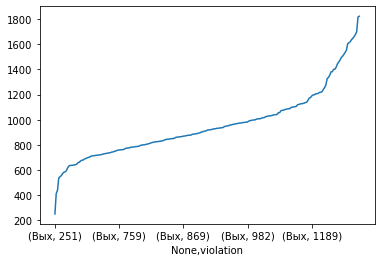

In [12]:
# задание 1 балл (сум 6)
# зависит ли количество правонарушений в среднем от дня недели (рабочий Пн-Пт или выходной Сб-Вс)
# визуализировать результат
# когда больше всего нарушений?
day_v = data.violation.resample('W').count()
pd.set_option("plotting.matplotlib.register_converters", True)
plot_df_weekend = day_v[day_v.index.dayofweek >=5]
plot_df_work = day_v[day_v.index.dayofweek < 5]
listdays = np.where(day_v.index.dayofweek>=5, 'Вых','Раб')
dfrv = day_v.groupby([listdays,day_v]).mean()
dfrv.plot()



## Неадекватный  водитель (Driving under the influence (DUI))
отсюда и ниже работам только с водителями под воздействием веществ (4 балла)

1. Отобрать водителей DUI
2. Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)
3. Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор).
4. Для выделенных частей проанализировать среднее количество правонарушений по часам суток, есль ли разница (если есть то в чем). 

Внимание! На каждой оси X должны стоять не абстрактные числа, а например часы или дни недели.

In [13]:
DUI = data[data.violation == 'DUI']
DUI

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,Asian,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,Hispanic,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-20 23:35:00,VT-2015-41728,VT,Putney,Windham County,50025.0,I 91 S MM21,BRATTLEBORO VSP,M,38.0,38.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,3.644600e+08
2015-11-22 00:02:00,VT-2015-41834,VT,Lyndonville,Caledonia County,50005.0,Lily Pond Rd,ST JOHNSBURY VSP,M,44.0,44.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,2.733421e+08
2015-11-30 20:16:00,VT-2015-43322,VT,Lyndon,Caledonia County,50005.0,I91 MM 137 NB,ST JOHNSBURY VSP,M,19.0,19.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-9.697686e+08
2015-12-30 18:22:00,VT-2015-45517,VT,Randolph,Orange County,50017.0,VT RT 66 & STOCK FARM RD,ROYALTON VSP,M,43.0,43.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-3.035562e+08


<AxesSubplot:>

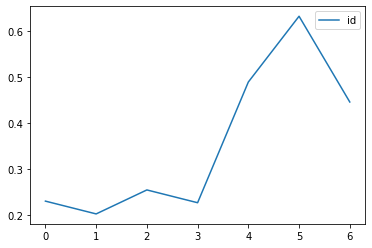

In [14]:
DUI_day = DUI.resample('D').agg({'id': 'count'})
DUI_day.groupby(DUI_day.index.dayofweek).mean().plot()

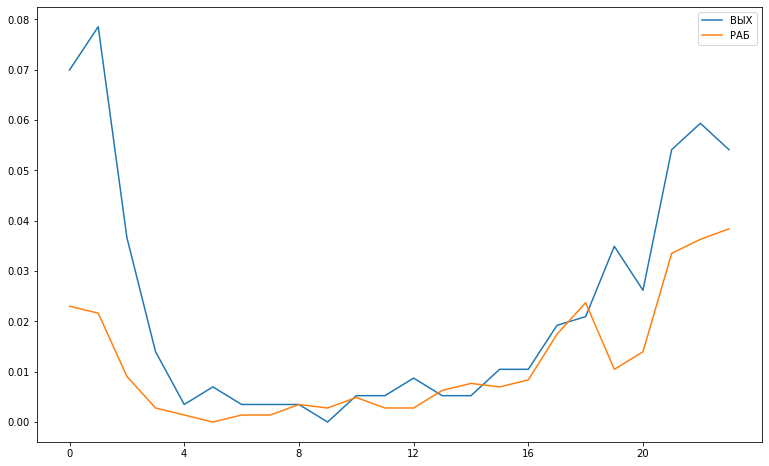

In [15]:
# разделить на выходные и рабочие дни
hour_v = DUI.violation.resample('H').count()
hour_v.head(100)
pd.set_option("plotting.matplotlib.register_converters", True)
plot_df_weekend = hour_v[hour_v.index.dayofweek >=5]
plot_df_work = hour_v[hour_v.index.dayofweek < 5]
listdays = np.where(hour_v.index.dayofweek>=5, 'Вых','Раб')
dfrv = hour_v.groupby([listdays,hour_v.index.hour]).mean()
fig, axes = plt.subplots(figsize = (13,8))
axes.plot(dfrv.loc['Вых'])
axes.plot(dfrv.loc['Раб'])
axes.legend(['ВЫХ','РАБ'])
plt.xticks(np.arange(0, 24, 4));